<a href="https://colab.research.google.com/github/OmarLopez1803/OMAR-LOPEZ-OLIVARES1/blob/main/%22AF6_ArbolDeDecision%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 6: Aprendizaje supervisado, árbol de decisión

Omar López Olivares Matrícula: 8002558

Carlos Yahir Bórquez Zazueta Matrícula: 8002560

**Cargar Librerías**



In [6]:
#Cargar liberías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**Cargar Datos**

In [7]:
#Cargar Datos
from google.colab import files
archivo=files.upload()

Saving data.csv to data (1).csv


In [8]:
#Cargar Datos
datos=pd.read_csv('data.csv')
datos['diagnosis'] = pd.factorize(datos['diagnosis'])[0]
datos.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
# Convertir columna 'diagnosis' a números: M = 0, B = 1
datos['diagnosis'] = pd.factorize(datos['diagnosis'])[0]

# Separar características (X) y etiquetas (y)
X = datos.drop(columns=['diagnosis'])
y = datos['diagnosis']

**Preprocesamiento de datos**

In [30]:
# Separar en entrenamiento y prueba
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)



**Selección y entrenamiento del modelo**

In [31]:
# Crear y entrenar el modelo
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(train_data, train_labels)

# Realizar 3 predicciones con el conjunto de prueba
print("Predicciones de muestra:")
predicciones_muestra = modelo.predict(test_data[:3])
print("Predichas:", predicciones_muestra)
print("Reales:   ", test_labels.values[:3])

Predicciones de muestra:
Predichas: [1 0 0]
Reales:    [1 0 0]


**Prueba del modelo**

In [11]:
# Evaluación del modelo
predicciones = modelo.predict(test_data)

In [19]:
# Obtener la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(test_labels, predicciones))

Matriz de confusión:
[[39  4]
 [ 4 67]]


In [20]:
# Precisión del modelo
print("Precisión del modelo:")
print(f"{accuracy_score(test_labels, predicciones):.2f}")

Precisión del modelo:
0.93


In [22]:
# Obtener el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(test_labels, predicciones, target_names=["Maligno", "Benigno"]))

Reporte de clasificación:
              precision    recall  f1-score   support

     Maligno       0.91      0.91      0.91        43
     Benigno       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



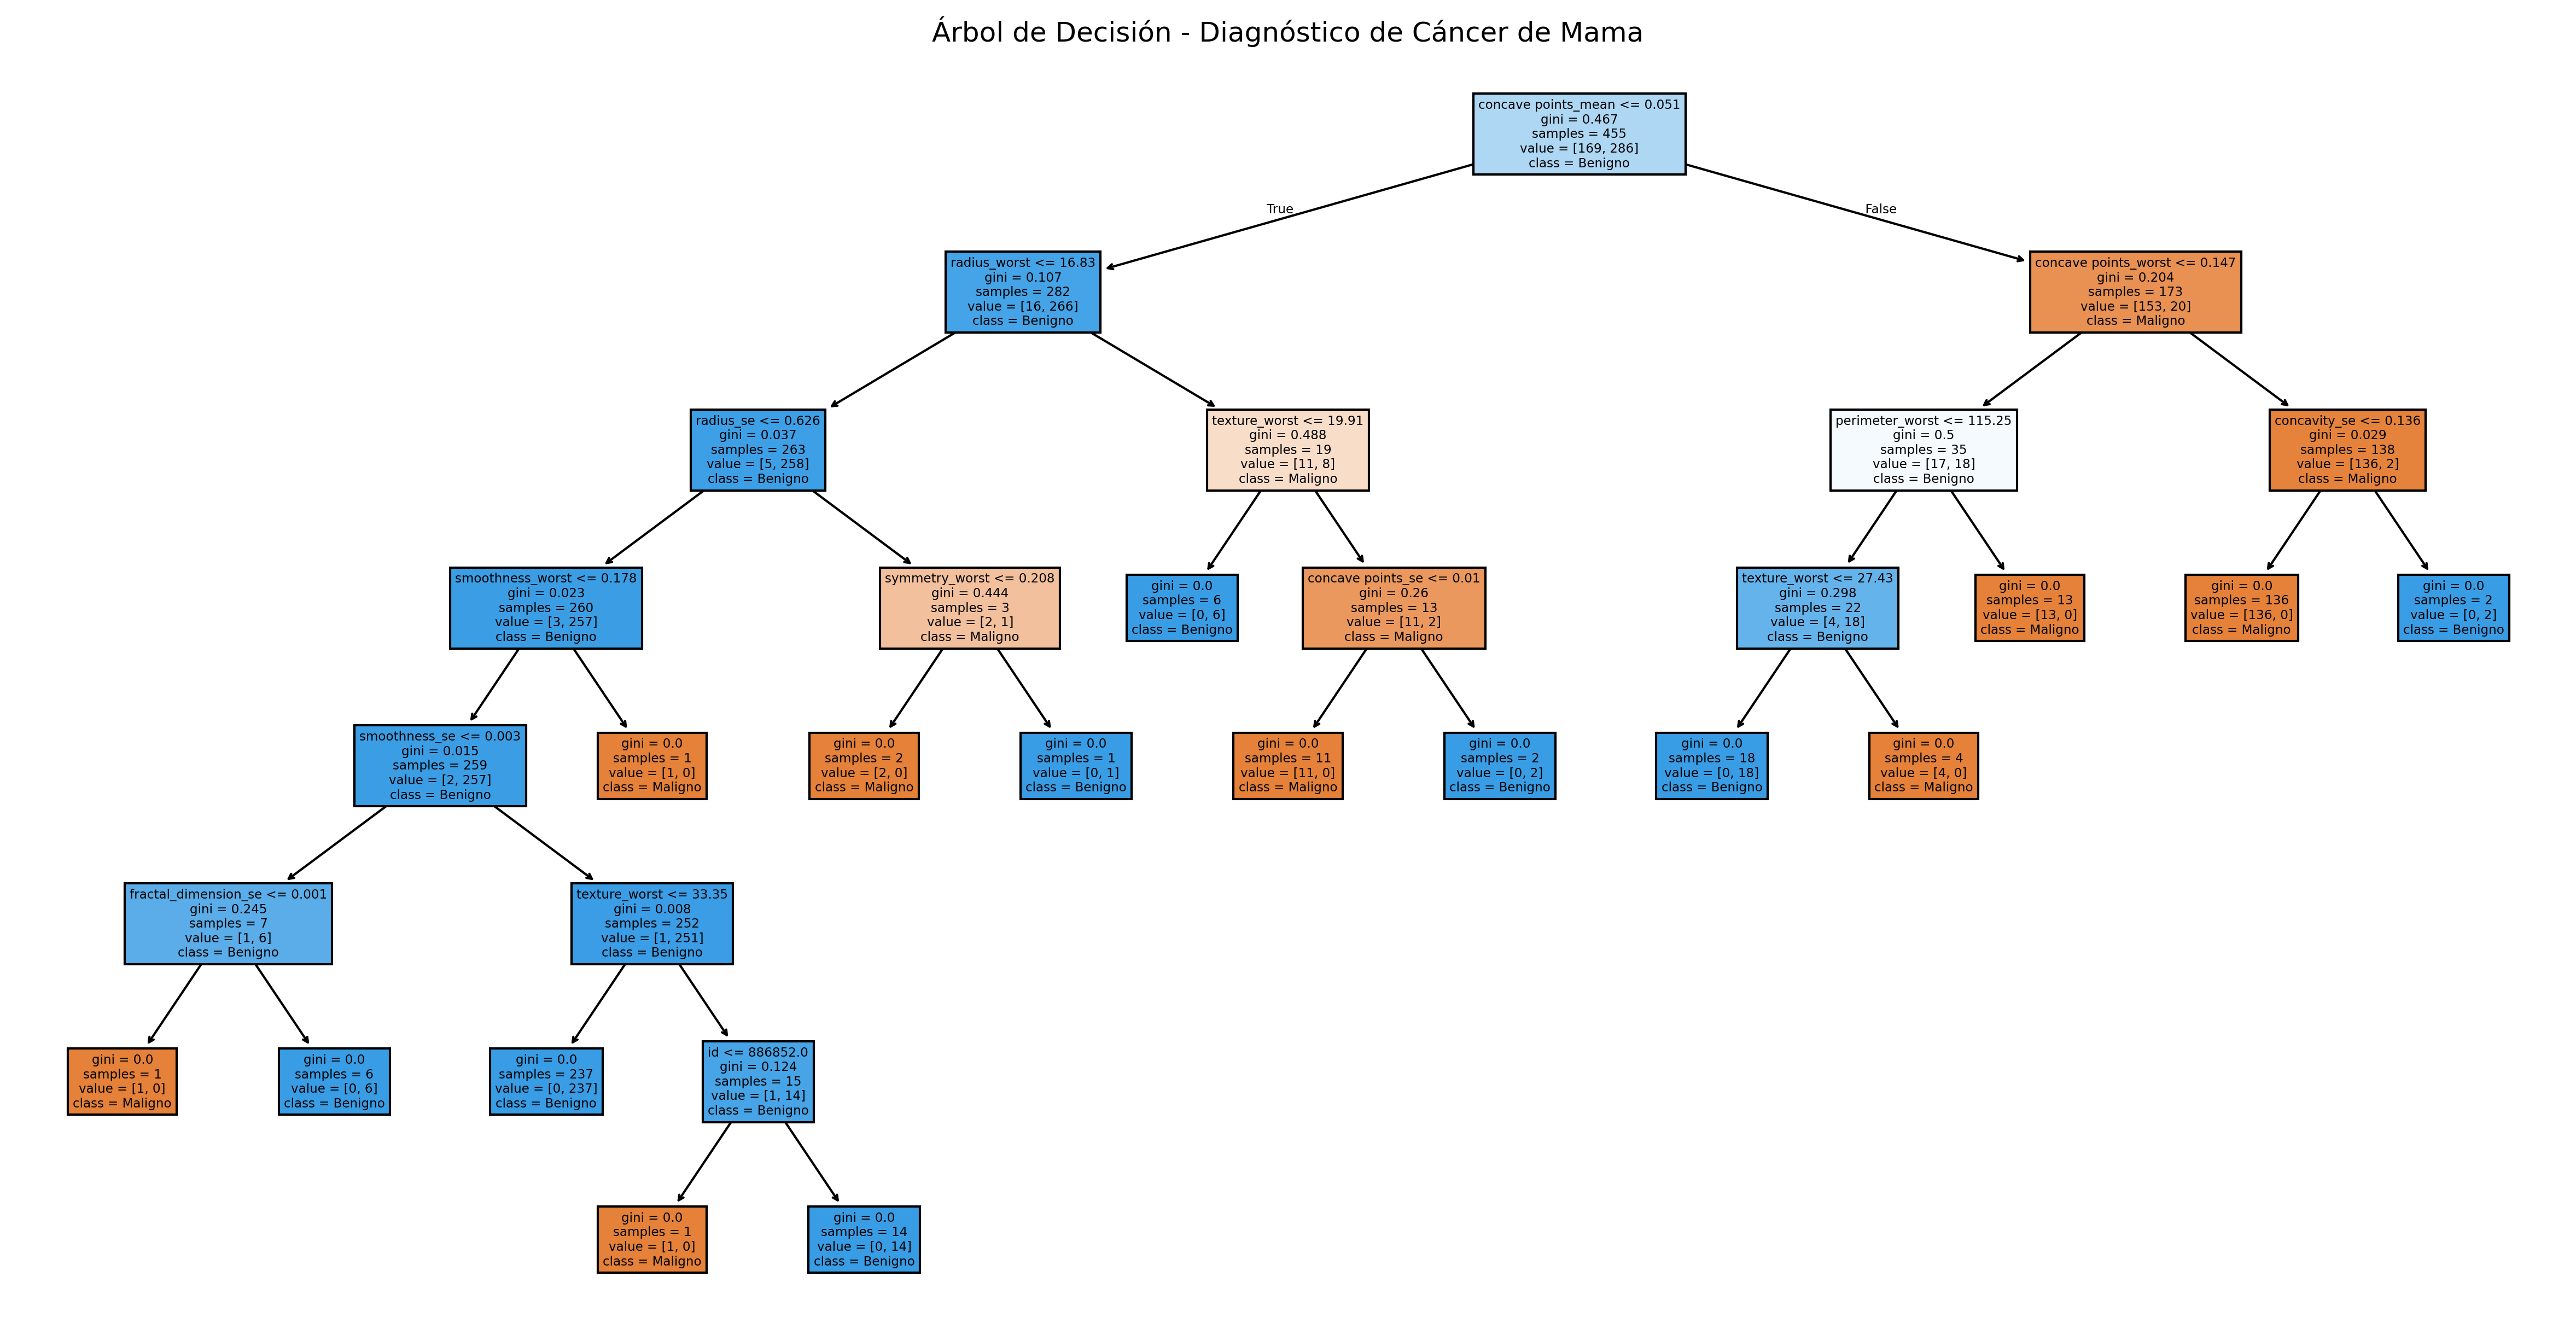

In [27]:
# Visualizar el árbol de decisión con DPI = 300
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(modelo,
          filled=True,
          feature_names=X.columns,
          class_names=["Maligno", "Benigno"])
plt.title("Árbol de Decisión - Diagnóstico de Cáncer de Mama")

#Para guardarlo png
plt.savefig("arbol_decision_cancer.png", dpi=300, bbox_inches='tight')
plt.show()

In [29]:
#Para descargarlo png

from google.colab import files
files.download("arbol_decision_cancer.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>